# Logisitic Regression. Gradient Ascent

In this notebook I write a little tutorial on Logisitc Regression (LR). Firstly, we will dive into theory and derive LR optimization problem and then will write the code for the algorithm of gradient ascent. Using gradient ascent we will find parameters of probability distribution (Bernoulli distribution) that maximizes the likelyhood of observed data. After finding the parameters we will plot the logistic function.

$\textrm{I}$. Our goal is to build a classification model, that predicts class of $y$, which is 0 or 1.

We want to use linear model $w^tx$ to make predictions.

In case of Linear Regression: $y = w^tx, -\infty \leq x \leq +\infty, -\infty \leq y \leq +\infty$

Since the linear model is unbounded we cannot fit such model as $y = b_0 + b_1x$, because it would give nonsenical results, when the output is binary.

We need to tranform LHS (the dependent variable) to match the range of RHS (feature variables).

1. First step is to use $P$ (probability of success, i.e. $P(y=1|x)$) instead of $y$. $0\leq P \leq 1$.

2. Now we introduce the odds: $O = \frac{P}{1-P}$. $0\leq O \leq +\infty$.

3. Finally taking $log$ of odds will yield a variable that ranges from negative to positive infinity.
    $-\infty \leq ln(O) \leq +\infty$
    
Now we have a model that makes sense:

$ln(\frac{P}{1-P}) = w^tx$. Both LHS and RHS has the same range.

We can derive $P$ from this equation:

$P = \frac{1}{1 + e^{-(w^tx)}}$

To sum up: we build a linear model that can predict the logarithm of odds $ln(O)$, and that can be transformed to probability. Thus our model predict the probability of $y$ belonging to class 1.

$\textrm{II}$. Now to estiamte the probability we first need to estimate vector of parameters w of our model. In order to estimate parameters we will maximize the likelyhood of our data. 

First we need to establish by what hypothesis (distribuition) the data was generated and then find values of parameters that maximizes the likelyhood of data. 

We assumed:

$P(y=1|x) = \frac{1}{1 + e^{-(w^tx)}}$, thus:

$P(y=0|x) = 1 - \frac{1}{1 + e^{-(w^tx)}}$, by law of total probability.

We have two classes and we know the probability of each.
A Bernoulli random variable has two possible outcomes: 0 or 1.
(A binomial distribution is the sum of independent and identically distributed Bernoulli random variables.
In general, if there are n Bernoulli trials, then the sum of those trials is binomially distributed with parameters n and p.) So each $y$ is a Bernoulli random variable, assuming that all $y$'s are independent we can write the likelyhood of data as: 

### $L(w) = \prod_{i}^{n}P^{y_i}(1-P)^{1-y_i}$

For more convient further optimization let's take log of likelyhood function:

### $l(w) = ln(\prod_{i}^{n}P^{y_i}(1-P)^{1-y_i}) = \sum_i^n ln(P^{y_i}(1-P)^{1-y_i})$ 

### $= \sum_i^n y_i ln(P)+(1-y_i)ln(1-P)$

### $\sum_i^n y_i ln\big(\frac{1}{1+e^{-w^tx}}\big)+(1-y_i)ln\big(\frac{1}{1+e^{w^tx}}\big)$

Log likelyhood derivative:

### $\frac{\partial l(w)}{\partial w_j} = \big(\frac{y}{g(w^tx)}-\frac{1-y}{1-g(w^tx)}\big)\frac{\partial g(w^tx)}{\partial w_j}$ 

### $=\big(\frac{y}{g(w^tx)}-\frac{1-y}{1-g(w^tx)}\big)g(w^tx)\big(1-g(w^tx)\big) \frac{\partial w^tx}{\partial w_j}$

### $=\big(\frac{y}{g(w^tx)}-\frac{1-y}{1-g(w^tx)}\big)g(w^tx)\big(1-g(w^tx)\big)x_j $

### $=\big(y(1-g(w^tx))-(1-y)g(w^tx)\big)x_j$

### $=\big(y - g(w^tx)\big)x_j$

Update rule:

### $w_{j+1} = w_j + \alpha\big(y - g(w^tx)\big)x_j$

plugging sigmoid function:

### $w_{j+1} = w_j + \alpha\big(y - \frac{1}{1+e^{-w^tx}}\big)x_j$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config IPCompleter.greedy=True

In [2]:
import os
os.chdir('/Users/Eddvibe/Developer/python/data')

In [3]:
ds = pd.read_csv('data_logistic.csv', header=None)
missing_values_count = ds.isnull().sum()
missing_values_count

0    0
1    0
2    0
dtype: int64

Data has some outliers:

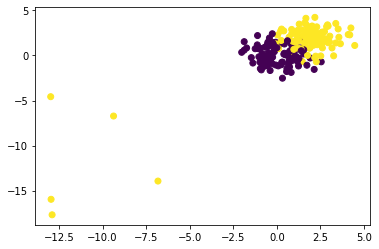

In [4]:
plt.scatter(ds.iloc[:,1], ds.iloc[:,2], c=ds.iloc[:,0].to_list())
plt.show()

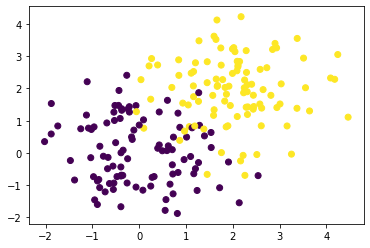

In [5]:
plt.scatter(ds[ds[2]>-2.5].iloc[:,1], ds[ds[2]>-2.5].iloc[:,2], c=ds[ds[2]>-2.5].iloc[:,0].tolist())
plt.show()

In [6]:
#Preparing Data

ds = pd.read_csv('data_logistic.csv', header=None)
ds[0].replace(to_replace=-1, value=0, inplace=True)
ds = ds[ds[2]>-2.5]
ds = ds.round(2)
ds = ds.values
X = ds[:,1:]
y = ds[:,0]

In [7]:
# Likelyhood function with bias

def LL_b(X, y, w, b):
    ll = 0
    for i in range(len(X)):
        if y[i] == 1:
            ll += float( np.log( 1/(1+np.e**(-(np.dot(w, X[i, :])+b )) ) ) )
        else:
            ll += float( (np.log( 1/(1+np.e**(np.dot(w, X[i, :])+b))) ) )
    
    return ll

In [8]:
# Likelyhood function w/o bias

def LL(X, y, w):
    ll = 0
    for i in range(len(X)):
        if y[i] == 1:
            ll += float( np.log( 1/(1+np.e**(-(np.dot(w, X[i, :]))) ) ) )
        else:
            ll += float( (np.log( 1/(1+np.e**(np.dot(w, X[i, :])))) ) )
    
    return ll

In [9]:
# Algorithm of gradient ascent with bias

def gradient_ascent_bias(X, y, alpha, ep=0.000001, max_iter=10000):
    iter = 0
    converged = False
    #w = np.array([0.05, 0.05])
    #b = 0.05 
    w = np.random.random(X.shape[1])
    b = np.random.random()
    grad_w = 0
    grad_b = 0
    L_old = LL_b(X, y, w, b)
    
    while not converged:
        for i in range(len(X)):
            grad_w += (y[i]-(1/(1+np.e**(-(np.dot(w, X[i, :])+b)))))*X[i,:]
            grad_b += (y[i]-(1/(1+np.e**(-(np.dot(w, X[i, :])+b)))))
        w_new = w + alpha * grad_w
        w_new = w_new.reshape(2,)
        b_new = b + alpha * grad_b
        b_new = b_new.reshape(1,)
        L_new = LL_b(X, y, w_new, b_new)
        
        if abs(L_new - L_old) <= ep:
            print('Converged, iterations:', iter)
            converged = True
            w = w_new
            b = b_new
        
        iter += 1
        L_old = L_new
        w = w_new
        b = b_new
        grad_w = 0
        grad_b = 0
        
        if iter == max_iter:
            print('Max interations exceeded')
            converged = True
        
    return w, b

In [10]:
gradient_ascent_bias(X, y, 0.001)

Converged, iterations: 4219


(array([2.71856412, 2.17690951]), array([-4.68998778]))

In [11]:
# Algorithm of gradient ascent w/o bias
def gradient_ascent(X, y, alpha, ep=0.000001, max_iter=1000):
    iter = 0
    converged = False
    #w = np.array([0.05, 0.05])
    path = []
    w = np.random.random(X.shape[1])
    grad_w = 0
    L_old = LL(X, y, w)

    while not converged:
        for i in range(len(X)):
            grad_w += (y[i]-(1/(1+np.e**(-np.dot(w, X[i, :])))))*X[i,:]
        w_new = w + alpha * grad_w
        w_new = w_new.reshape(2,)
        L_new = LL(X, y, w_new)
        path.append(w_new)
        
        if abs(L_new - L_old) <= ep:
            print('Converged, iterations:', iter)
            converged = True
            w = w_new

        iter += 1
        L_old = L_new
        w = w_new
        grad_w = 0
        
        if iter == max_iter:
            print('Max interations exceeded')
            converged = True
        
    return w, path

In [12]:
w, path = gradient_ascent(X, y, 0.001)
w

Converged, iterations: 145


array([0.79759336, 0.55221369])

### Combining two algorithms in one function:

In [13]:
def optimizer(LL, gradient_ascent_bias, gradient_ascent, X, y, bias):
    if bias == True:
        return gradient_ascent_bias(X, y, 0.01)
    else:
        return gradient_ascent(X, y, 0.01)    

In [14]:
w, b = optimizer(LL, gradient_ascent_bias, gradient_ascent, X, y, bias=True)
print(w, b)

Converged, iterations: 538
[2.72861605 2.18488795] [-4.70863583]


### Comparing our results with sklearn library:

In [15]:
from sklearn.linear_model import LogisticRegression

clf_bias = LogisticRegression(penalty='none', fit_intercept=True, solver='sag')
clf_bias.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='none',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
print(clf_bias.coef_, clf_bias.intercept_)

[[2.73422561 2.18943115]] [-4.71910567]


In [17]:
clf = LogisticRegression(penalty='none', fit_intercept=False, solver='sag')
clf.fit(X,y)

print(clf.coef_)

[[0.7969004  0.55289242]]


### Gradient Ascent Path:

In [18]:
w_nb, path = gradient_ascent(X, y, 0.001)
path = np.array(path)

Converged, iterations: 201


In [19]:
w1 = np.linspace(-2,2, 300)
w2 = np.linspace(-2,2, 300)
W1, W2 = np.meshgrid(w1, w2)
W = np.c_[W1.ravel(), W2.ravel()]

In [20]:
ll = []
for i in range(len(W)):
    ll.append(LL(X, y, W[i]))
    
ll = np.array(ll)
ll = ll.reshape(300,300)

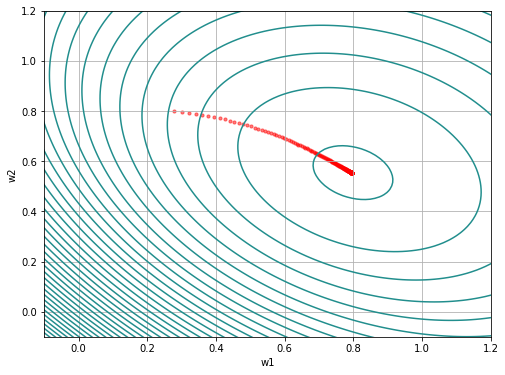

In [21]:
plt.figure(figsize=(8,6))
levels = np.arange(-5000,5000,2)
CS = plt.contour(w1,w2,ll, levels=levels)
#plt.clabel(CS, inline=1, fontsize=10)
#plt.plot(0.79603229, 0.55345524, 'b+', color='r', mew=2, ms=10)
plt.scatter(path[:, 0], path[:, 1], s=10, color='r', alpha=0.5, linewidths=1)

plt.grid()
plt.xlim(right=1.2)
plt.xlim(left=-0.1)
plt.ylim(top=1.2)
plt.ylim(bottom=-0.1)
plt.xlabel('w1')
plt.ylabel('w2')
plt.show()

### Plotting the decision boundary:

In [22]:
from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
import chart_studio.plotly
import plotly.graph_objs as go
import plotly.offline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

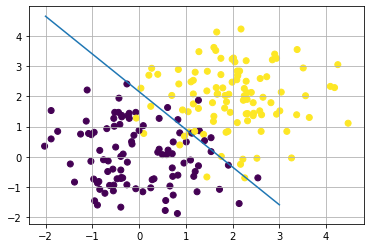

In [23]:
xx = np.linspace(-2, 3)
a = -w[0]/w[1]
yy = a*xx - b/w[1]

plt.scatter(ds[:,1], ds[:,2], c=ds[:,0].tolist(), cmap=cm.viridis)
plt.plot(xx, yy)
plt.grid()
plt.show()

### Plotting 3d surface of logistic regression:

In [24]:
#w, b = optimizer(LL, gradient_ascent_bias, gradient_ascent, X, y, bias=True)

def logistic_func(xx, yy, w, b):
    ll = []
    for i in range(len(xx)):
        ll.append(1/(1+np.e**(-(w[0]*xx[i]+w[1]*yy[i]+b))))
    
    return ll

In [25]:
xx = np.arange(-3,3, 0.1)
yy = np.arange(-3,3, 0.1)

XX, YY = np.meshgrid(xx,yy)

LL = logistic_func(XX, YY, w, b)
LL = np.array(LL)

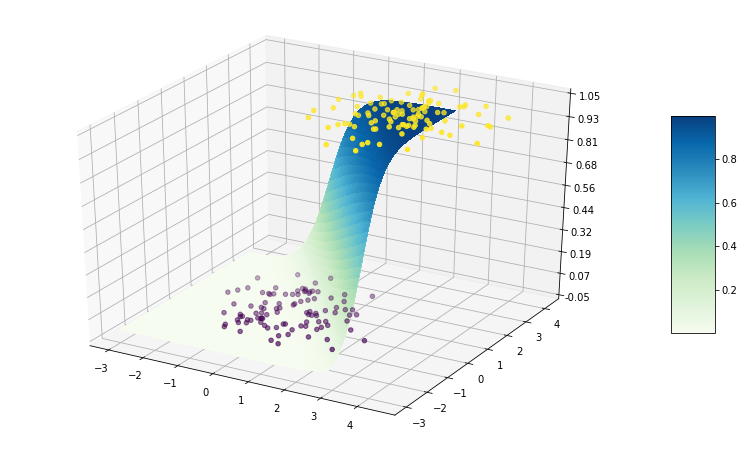

In [26]:
fig = plt.figure(figsize = (14,8))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(XX, YY, LL, rstride=1, cstride=1, cmap=cm.GnBu, linewidth=0, antialiased=False)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.scatter(ds[:,1], ds[:,2], y, c=ds[:,0].tolist(), cmap=cm.viridis)
plt.show()